In [6]:
import tempfile
import subprocess
import base64
import os

def render_graphviz(dot_code: str, format: str = "png") -> str:
    """
    Render Graphviz DOT code to an image and return as base64 string.

    Args:
        dot_code: The Graphviz DOT language code.
        format: Output format (default: png, can be svg, pdf, etc.)

    Returns:
        Base64-encoded image data (e.g., for PNG: "data:image/png;base64,...")
    """
    with tempfile.TemporaryDirectory() as tmpdir:
        dot_path = os.path.join(tmpdir, "graph.dot")
        out_path = os.path.join(tmpdir, f"graph.{format}")
        with open(dot_path, "w") as f:
            f.write(dot_code)
        try:
            subprocess.run(
                ["/opt/homebrew/bin/dot", f"-T{format}", dot_path, "-o", out_path],
                check=True,
                capture_output=True
            )
            with open(out_path, "rb") as imgf:
                img_data = imgf.read()
            b64 = base64.b64encode(img_data).decode()
            mime = f"image/{'svg+xml' if format == 'svg' else format}"
            return f"data:{mime};base64,{b64}"
        except Exception as e:
            return f"Graphviz rendering failed: {e}"


''
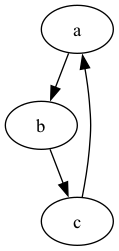

In [9]:
render_graphviz(""" digraph sample {
    a->b;b->c;c->a; }""", "png")